In [1]:
!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-10-24 05:06:04--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-10-24 05:06:04--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.101, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eshg3khbsn1livuidv799e8hhqanm6j0/1666587900000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download&uuid=e9c647a6-7d97-413c-887d-9d79833523af [following]
--2022-10-24 05:06:05--  https://doc-0c-10-docs.go

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# EDA

In [13]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [14]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


행열 갯수 관찰하기 (shape)

In [16]:
print(f"train의 행열 개수 : {train.shape}")
print(f"test의 행열 개수 : {test.shape}")

train의 행열 개수 : (1459, 11)
test의 행열 개수 : (715, 10)


In [4]:
train.interpolate(inplace=True)
test.fillna(0, inplace=True)

결측치 확인하기

In [17]:
train.isnull().sum()
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

데이터 정보 확인

In [18]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dt

수치데이터 특성보기

In [19]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.712132,0.031528,2.480192,52.247087,1404.851953,0.039267,57.532214,30.539068,108.563400
std,631.338681,6.922790,5.237913,0.174801,1.377393,20.362645,582.880176,0.019276,31.371138,14.532436,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,880.000000,0.026000,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.039000,52.000000,27.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,69.000000,1994.000000,0.052000,70.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


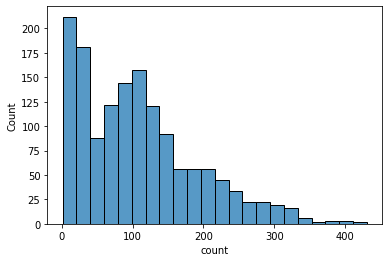

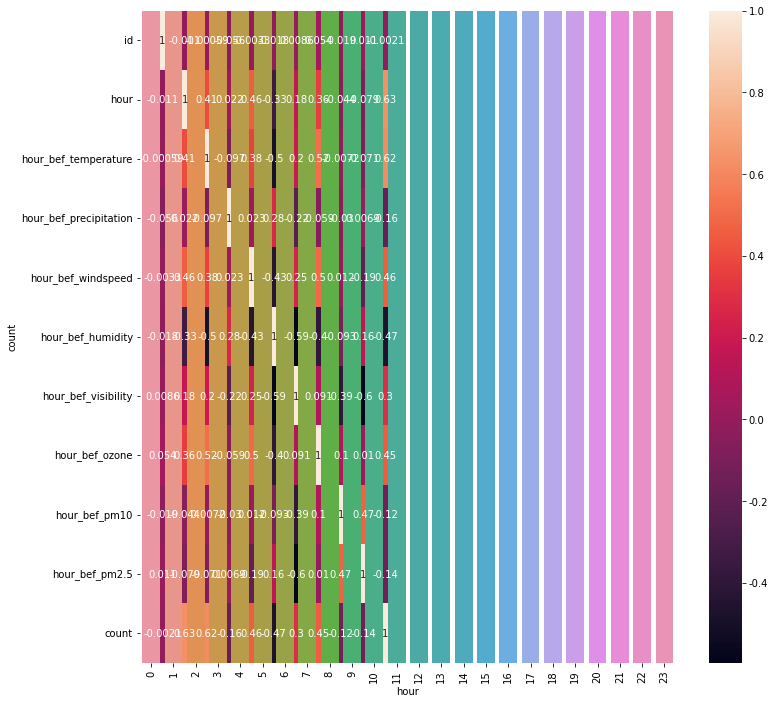

In [22]:
# 시각화 라이브러리 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고메세지 숨기기
# import warnings
# warnings.filterwarnings('ignore')
# 주석처리해도...아무일도 일어나지 않는다..?

sns.histplot(train['count'])

train.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot=True)

sns.barplot(x = 'hour', y = 'count', data = train)

# 데이터 전처리

## 결측치 처리하기

In [24]:
train.dropna(inplace = True)
train.fillna(0, inplace = True)

train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace = True)

train.interpolate(inplace=True)

## 연속형 변수 변환

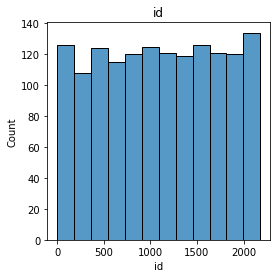

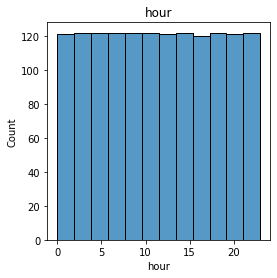

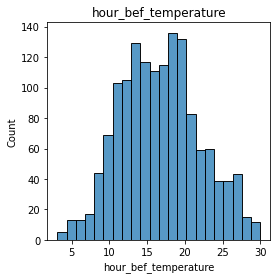

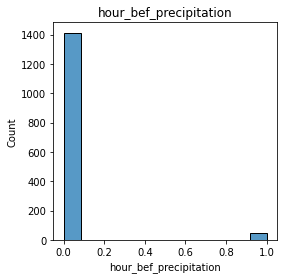

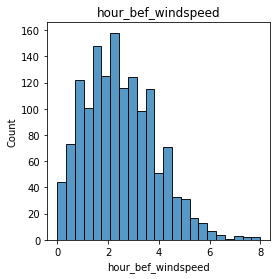

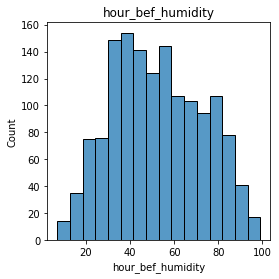

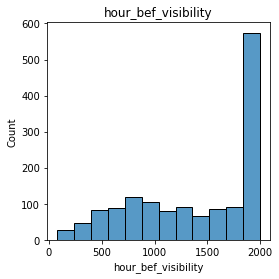

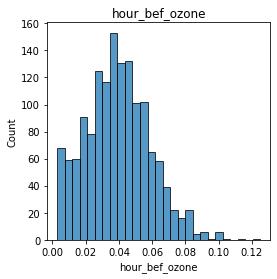

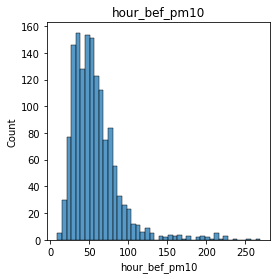

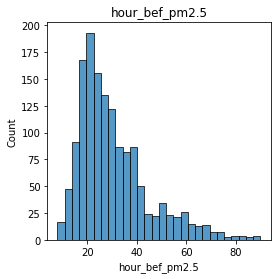

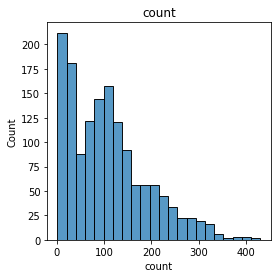

In [25]:
for col in train.columns:
  plt.figure(figsize = (4,4))
  plt.title(col)
  sns.histplot(train[col])
  plt.show()

In [27]:
import numpy as np

test['hour_bef_pm2.5'] = np.log1p(test['hour_bef_pm2.5'])
test['hour_bef_pm10'] = np.log1p(test['hour_bef_pm10'])

sns.histplot(train['hour_bef_pm2.5'])

KeyError: ignored